In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/rossmann-store-sales/test.csv
/kaggle/input/rossmann-store-sales/train.csv
/kaggle/input/rossmann-store-sales/store.csv
/kaggle/input/rossmann-store-sales/sample_submission.csv


In [2]:
df=pd.read_csv('/kaggle/input/rossmann-store-sales/train.csv')
store=pd.read_csv('/kaggle/input/rossmann-store-sales/store.csv')
test=pd.read_csv('/kaggle/input/rossmann-store-sales/test.csv')
print(df.shape)
print(store.shape)
print(test.shape)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1017209, 9)
(1115, 10)
(41088, 8)


In [3]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


## EDA

In [6]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [7]:
print(df.describe()[['Sales','Customers']].loc['max'])
print(df.describe()[['Sales','Customers']].loc['min'])

Sales        41551.0
Customers     7388.0
Name: max, dtype: float64
Sales        0.0
Customers    0.0
Name: min, dtype: float64


## there is max sale is 41551
##  max customer has arrived for that perticuler store

In [8]:
df.describe(include='object')

,Date,StateHoliday
count,1017209,1017209
unique,942,5
top,2015-01-21,0
freq,1115,855087


1023    942
666     942
675     942
163     942
674     942
       ... 
900     758
902     758
903     758
904     758
512     758
Name: Store, Length: 1115, dtype: int64

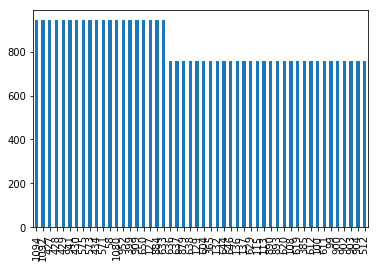

In [9]:
df['Store'].nunique()
df.Store.value_counts().head(20).plot.bar()
df.Store.value_counts().tail(50).plot.bar()
df.Store.value_counts()

In [10]:
df.DayOfWeek.value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [11]:
df.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [12]:
df.Promo.value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [13]:
df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [14]:
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [16]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [17]:
Store_id=df.Store.unique()[0]
print(Store_id)
store_rows=df[df['Store']==Store_id]
print(store_rows.shape)

1
(942, 9)


In [18]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df['Date'].head()

0   2015-07-31
1   2015-07-31
2   2015-07-31
3   2015-07-31
4   2015-07-31
Name: Date, dtype: datetime64[ns]

In [19]:
# store_rows.resample('1D',on='Date')['Sales'].sum().plot.line()

In [20]:
store_rows[store_rows['Sales']==0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5575,1,7,2015-07-26,0,0,0,0,0,0
13380,1,7,2015-07-19,0,0,0,0,0,0
21185,1,7,2015-07-12,0,0,0,0,0,0
28990,1,7,2015-07-05,0,0,0,0,0,0
36795,1,7,2015-06-28,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
987105,1,7,2013-01-27,0,0,0,0,0,0
994910,1,7,2013-01-20,0,0,0,0,0,0
1002715,1,7,2013-01-13,0,0,0,0,0,0
1010520,1,7,2013-01-06,0,0,0,0,0,1


In [21]:
test['Date']=pd.to_datetime(test['Date'],format='%Y-%m-%d')
store_test_row=test[test['Store']==Store_id]
store_test_row['Date'].min(),store_test_row['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [22]:
store_test_row['Open'].value_counts()

1.0    41
0.0     7
Name: Open, dtype: int64

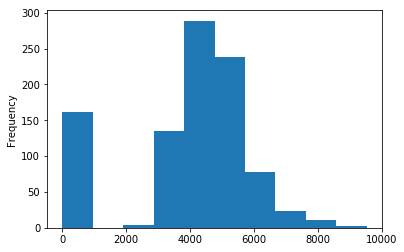

In [23]:
store_rows['Sales'].plot.hist()

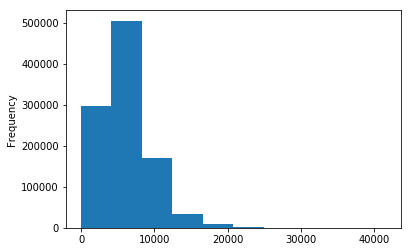

In [24]:
df.Sales.plot.hist()

In [25]:
store[store['Store']==Store_id].T

,0
Store,1
StoreType,c
Assortment,a
CompetitionDistance,1270
CompetitionOpenSinceMonth,9
CompetitionOpenSinceYear,2008
Promo2,0
Promo2SinceWeek,NaN
Promo2SinceYear,NaN
PromoInterval,NaN


In [26]:
store[~store['Promo2SinceWeek'].isna()].iloc[0]  ## no value missing there take that recored

Store                                      2
StoreType                                  a
Assortment                                 a
CompetitionDistance                      570
CompetitionOpenSinceMonth                 11
CompetitionOpenSinceYear                2007
Promo2                                     1
Promo2SinceWeek                           13
Promo2SinceYear                         2010
PromoInterval                Jan,Apr,Jul,Oct
Name: 1, dtype: object

In [27]:
## missing value

In [28]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [29]:
# Method 1

store['Promo2SinceWeek']=store['Promo2SinceWeek'].fillna(0)  ## fill with 0 bcz if there is no promo2 then we can say there could be 
store['Promo2SinceYear']=store['Promo2SinceYear'].fillna(store['Promo2SinceYear'].mode().iloc[0])
store['PromoInterval']=store['PromoInterval'].fillna(store['PromoInterval'].mode().iloc[0])

In [30]:
store['CompetitionDistance']=store['CompetitionDistance'].fillna(store['CompetitionDistance'].max())  ## fill with 0 bcz if there is no promo2 then we can say there could be 
store['CompetitionOpenSinceMonth']=store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode().iloc[0])
store['CompetitionOpenSinceYear']=store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode().iloc[0])
store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [31]:
df1=df.merge(store,on='Store',how='left')
print(df.shape)
print(df1.shape)
print(df1.isna().sum())

(1017209, 9)
(1017209, 18)
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [32]:
df1.dtypes
## 3 categorical,1 date coulmm, rest are numerical
df1['day']=df1['Date'].dt.day
df1['month']=df1['Date'].dt.month
df1['year']=df1['Date'].dt.year
# df1['day of week']=df1['Date'].dt.steftime('%a') #this is already there is data in Dayofweek

In [33]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015


In [34]:
df1.dtypes
#StateHoliday,StoreType,Assortment,PromoInterval
df1['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [35]:
df1['StateHoliday']=df1['StateHoliday'].map({'0':0,0:0,'a':1,'b':2,'c':3})
df1['StateHoliday']=df1['StateHoliday'].astype(int)


In [36]:
df1['StateHoliday']

0          0
1          0
2          0
3          0
4          0
          ..
1017204    1
1017205    1
1017206    1
1017207    1
1017208    1
Name: StateHoliday, Length: 1017209, dtype: int64

In [37]:
df1['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [38]:
df1['Assortment']=df1['Assortment'].map({'a':0,'b':1,'c':2})
df1['Assortment']=df1['Assortment'].astype(int)

In [39]:
df1['StoreType'].unique()
df1['StoreType']=df1['StoreType'].map({'a':0,'b':1,'c':2,'d':4})
df1['StoreType']=df1['StoreType'].astype(int)

In [40]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270.0,9.0,2008.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620.0,9.0,2009.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910.0,4.0,2015.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015


In [41]:
df1['PromoInterval'].unique()
df1['PromoInterval']=df1['PromoInterval'].map({'Jan,Apr,Jul,Oct':0,'Feb,May,Aug,Nov':1,'Mar,Jun,Sept,Dec':2})
df1['PromoInterval']=df1['PromoInterval'].astype(int)


## split train & validate

In [42]:
features=df1.columns.drop(['Sales','Date','Customers'])

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df1[features],np.log(df1['Sales']+1) , test_size=0.2, random_state=42)  ## taking log on traget veribale just because of it was right skewed and it having large no. like from 0 to 40000

In [43]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((813767, 18), (203442, 18), (813767,), (203442,))

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
mod=DecisionTreeRegressor(max_depth=11,random_state=1).fit(X_train,y_train)
val_y_prd=mod.predict(X_val)

In [46]:
# def draw_tree(model, columns):
#     import pydotplus
#     from sklearn.externals.six import StringIO
#     from IPython.display import Image
#     import os
#     from sklearn import tree
    
#     graphviz_path = 'C:\Program Files (x86)\Graphviz2.38/bin/'
#     os.environ["PATH"] += os.pathsep + graphviz_path

#     dot_data = StringIO()
#     tree.export_graphviz(model,
#                          out_file=dot_data,
#                          feature_names=columns)
#     graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#     return Image(graph.create_png())

In [47]:
# !pip install pydotplus

In [48]:
# draw_tree(mod,features )

In [49]:
from sklearn.metrics import mean_squared_error
val_y_inv=np.exp(y_val)-1
val_y_pred_inv=np.exp(val_y_prd)-1
np.sqrt(mean_squared_error(val_y_inv,val_y_pred_inv))


2096.881691850318

Prepocessing
 - missing value
-  mergeing data with store
 - lable encoding


In [50]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [51]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


if we not having cistomer column in test data setso we build model without the customer column 
but customer column is very imp as we see in decusion tree

<BarContainer object of 18 artists>

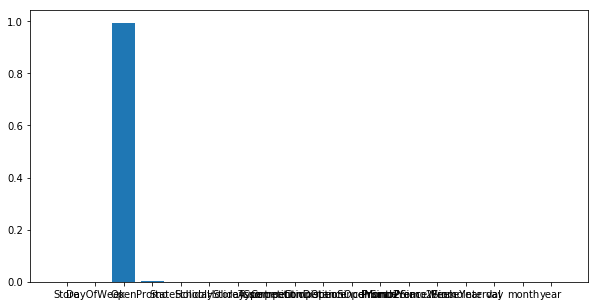

In [52]:
import matplotlib.pyplot as plt  ## chceking which column is imp in decisison treef
plt.figure(figsize=(10,5))
yvalues=mod.feature_importances_
plt.bar(features,yvalues)

In [53]:
df1.corr().loc['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
Assortment                   0.074941
month                        0.048768
year                         0.023519
CompetitionOpenSinceYear     0.008740
Store                        0.005126
day                         -0.011612
StoreType                   -0.015912
CompetitionOpenSinceMonth   -0.023226
CompetitionDistance         -0.024339
Promo2SinceYear             -0.040708
Promo2SinceWeek             -0.044143
PromoInterval               -0.071308
Promo2                      -0.091040
StateHoliday                -0.229029
DayOfWeek                   -0.462125
Name: Sales, dtype: float64

In [54]:
store_avg_cuts=df.groupby(['Store'])[['Customers']].mean().reset_index().astype(int) ## take aaverge of customer per store and that column will add on test data 

In [55]:
test_1=test.merge(store_avg_cuts,on='Store',how='left')
test.shape,test_1.shape

((41088, 8), (41088, 9))

In [56]:
df2=test_1.merge(store,on='Store',how='left')
df2.isna().sum()

Id                            0
Store                         0
DayOfWeek                     0
Date                          0
Open                         11
Promo                         0
StateHoliday                  0
SchoolHoliday                 0
Customers                     0
StoreType                     0
Assortment                    0
CompetitionDistance           0
CompetitionOpenSinceMonth     0
CompetitionOpenSinceYear      0
Promo2                        0
Promo2SinceWeek               0
Promo2SinceYear               0
PromoInterval                 0
dtype: int64

In [57]:
df2['Open']=df2['Open'].fillna(df2['Open'].mode().iloc[0])

In [58]:
df2['Date']=pd.to_datetime(df2['Date'],format='%Y-%m-%d')
df2['day']=df2['Date'].dt.day
df2['month']=df2['Date'].dt.month
df2['year']=df2['Date'].dt.year

In [59]:
df2.shape,df1.shape

((41088, 21), (1017209, 21))

In [60]:
df2['StateHoliday']=df2['StateHoliday'].map({'0':0,'a':1})
df2['StateHoliday']=df2['StateHoliday'].astype(int)
df2['Assortment']=df2['Assortment'].map({'a':0,'b':1,'c':2})
df2['Assortment']=df2['Assortment'].astype(int)
# df1['StoreType'].unique()
df2['StoreType']=df2['StoreType'].map({'a':0,'b':1,'c':2,'d':4})
df2['StoreType']=df2['StoreType'].astype(int)
# df1['PromoInterval'].unique()
df2['PromoInterval']=df2['PromoInterval'].map({'Jan,Apr,Jul,Oct':0,'Feb,May,Aug,Nov':1,'Mar,Jun,Sept,Dec':2})
df2['PromoInterval']=df2['PromoInterval'].astype(int)

In [61]:
df2.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Customers,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year
0,1,1,4,2015-09-17,1.0,1,0,0,467,2,...,1270.0,9.0,2008.0,0,0.0,2011.0,0,17,9,2015
1,2,3,4,2015-09-17,1.0,1,0,0,620,0,...,14130.0,12.0,2006.0,1,14.0,2011.0,0,17,9,2015
2,3,7,4,2015-09-17,1.0,1,0,0,791,0,...,24000.0,4.0,2013.0,0,0.0,2011.0,0,17,9,2015
3,4,8,4,2015-09-17,1.0,1,0,0,547,0,...,7520.0,10.0,2014.0,0,0.0,2011.0,0,17,9,2015
4,5,9,4,2015-09-17,1.0,1,0,0,479,0,...,2030.0,8.0,2000.0,0,0.0,2011.0,0,17,9,2015


In [62]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270.0,9.0,2008.0,0,0.0,2011.0,0,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570.0,11.0,2007.0,1,13.0,2010.0,0,31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130.0,12.0,2006.0,1,14.0,2011.0,0,31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620.0,9.0,2009.0,0,0.0,2011.0,0,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910.0,4.0,2015.0,0,0.0,2011.0,0,31,7,2015


In [63]:
df2.dtypes

Id                                    int64
Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Open                                float64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
Customers                             int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                         int64
day                                   int64
month                                 int64
year                                  int64
dtype: object

In [64]:
test_pred=mod.predict(df2[features])
test_pred_inv=np.exp(test_pred)-1
submission_predicted=pd.DataFrame({'ID':test['Id'],'Sales':test_pred_inv})
submission_predicted.to_csv('submission.csv',index=False)
submission_predicted.head()


,ID,Sales
0,1,7104.341338
1,2,7552.757993
2,3,7558.547790
3,4,7104.341338
4,5,7558.547790


In [65]:
# Credit: kaggle.com
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(y, yhat):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

In [66]:
val_y_inv=np.exp(y_val)-1
val_y_pred_inv=np.exp(val_y_prd)-1
rmse=np.sqrt(mean_squared_error(val_y_inv,val_y_pred_inv))
rmspe=rmspe(val_y_inv,val_y_pred_inv)
print(rmse,rmspe)

2096.881691850318 0.35904202512702454


In [67]:
## Hyperparamter tunning


from sklearn.model_selection import GridSearchCV
def get_rmspe_score(mod,input_value,y_actual):
    y_predicted=mod.predict(input_value)
    y_actual=np.exp(y_actual)-1
    y_predicted=np.exp(y_predicted)-1
    score=rmspe(y_actual,y_predicted)## put scroing is 
    return score
paramter={'max_depth':list(range(5,8))}
base_model=DecisionTreeRegressor()
cv_model=GridSearchCV(base_model,param_grid=paramter,return_train_score=True,scoring=get_rmspe_score).fit(X_train,y_train)
pd.DataFrame(cv_model.cv_results_)[['params','mean_test_score','mean_train_score']]


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


TypeError: 'numpy.float64' object is not callable

In [68]:
# cv_model.best_params_

In [69]:
# cv_model.cv_results_

In [70]:
'''
df_cv_results=pd.DataFrame(cv_model.cv_results_)## which model is best & how each model work here
# print(df_cv_results)
df_cv_results.set_index('param_max_depth')['mean_test_score'].plot.line()
df_cv_results.set_index('param_max_depth')['mean_train_score'].plot.line()
plt.legend(['test score','train score']) # as we can see that after max_depth after 12 our train & test scorce vary from each other so we choosing 11 as max_depth as optimal for better model

'''

"\ndf_cv_results=pd.DataFrame(cv_model.cv_results_)## which model is best & how each model work here\n# print(df_cv_results)\ndf_cv_results.set_index('param_max_depth')['mean_test_score'].plot.line()\ndf_cv_results.set_index('param_max_depth')['mean_train_score'].plot.line()\nplt.legend(['test score','train score']) # as we can see that after max_depth after 12 our train & test scorce vary from each other so we choosing 11 as max_depth as optimal for better model\n\n"

In [71]:
df_cv_results[df_cv_results['param_max_depth']==11].T

NameError: name 'df_cv_results' is not defined

In [72]:
test_pred=mod.predict(df2[features])
test_pred_inv=np.exp(test_pred)-1
submission_predicted=pd.DataFrame({'ID':test['Id'],'Sales':test_pred_inv})
submission_predicted.to_csv('submission.csv',index=False)
submission_predicted.head()

,ID,Sales
0,1,7104.341338
1,2,7552.757993
2,3,7558.547790
3,4,7104.341338
4,5,7558.547790
